In [243]:
import seaborn as sns
import nltk
import collections as co
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec 
sns.set(font_scale=2)

In [213]:
df = pd.read_csv('final_dataset.csv')#, encoding='cp437')
df = df.drop(['Unnamed: 0'], axis=1)
#df[['month_added','year_added']] = df.date_added.str.split(",",expand=True,)
df.head()

,title,country,year_added,release_year,rating,duration,listed_in,description,user_rating
0,Limitless,United States,2016,2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.0
1,Gilmore Girls: A Year in the Life,United States,2016,2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.0
2,Charmed,United States,2017,2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.0
3,Revenge,NaN,2019,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.0
4,The Jungle Book,"India, Germany, France",2019,2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.0


In [214]:
print('There are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())

There are  7 types of ratings in the dataset:  ['TV-14' 'TV-PG' 'TV-MA' 'TV-Y7' 'TV-G' 'TV-Y' 'TV-Y7-FV']


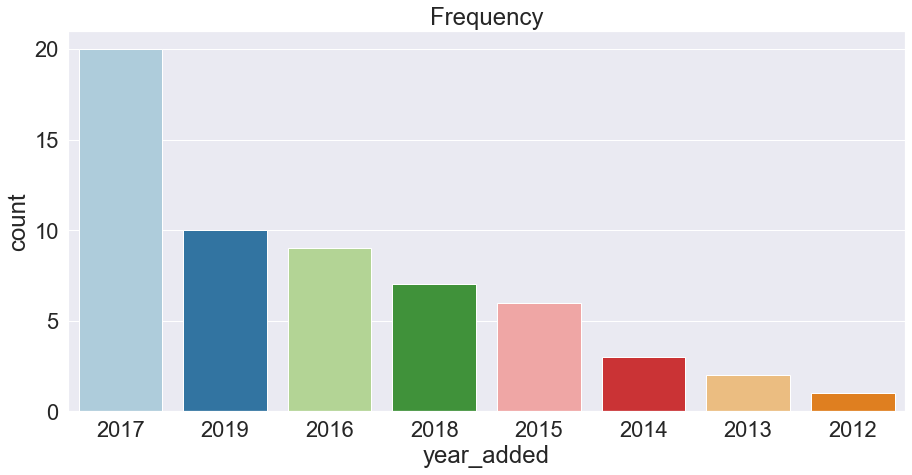

In [215]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "year_added", order=df['year_added'].value_counts().index[0:15] ,data=df,palette=sns.color_palette("Paired", 15))

# Description: This is a bar graph that shows the number of items released on Netflix for various years found in dataset. 

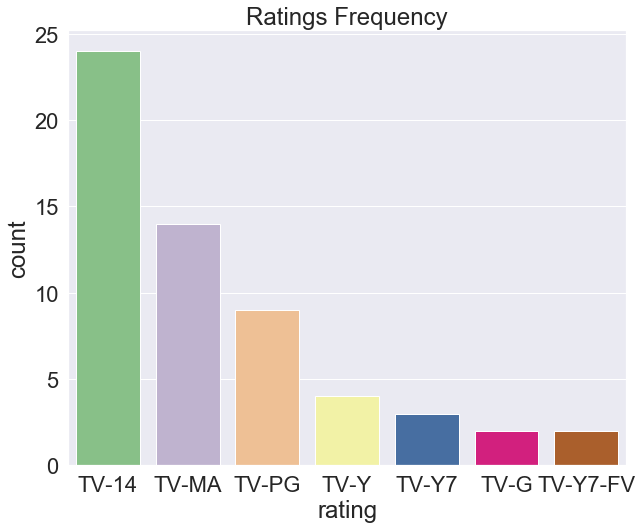

In [216]:
plt.figure(figsize=(10,8))
plt.title("Ratings Frequency")
sns.countplot(x='rating',data=df,order=df['rating'].value_counts().index,palette='Accent')
plt.show()

# Description: This is a bar graph that shows the frequency of various mpaa ratings in the csv file

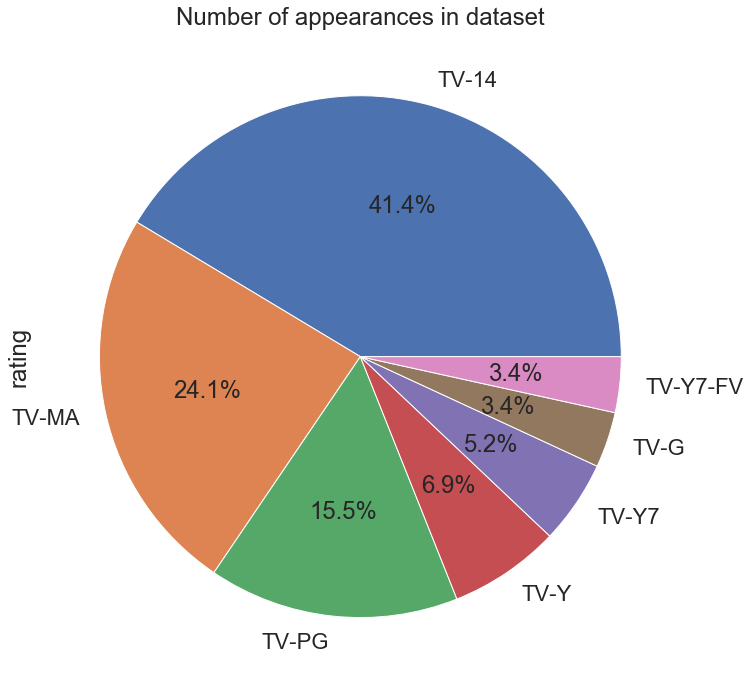

In [219]:
plt.figure(figsize=(12,12))
df.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in dataset')
plt.show()

In [231]:
df1 = df.loc[df['year_added']==2017]
df2 = df.loc[df['year_added']==2019]
df3 = df.loc[df['year_added']==2016]
df4 = df.loc[df['year_added']==2018]
df5 = df.loc[df['year_added']==2015]
df6 = df.loc[df['year_added']==2014]
df7 = df.loc[df['year_added']==2013]
df8 = df.loc[df['year_added']==2012]

In [ ]:
#attempt to show the breakdown of ratings per year_added

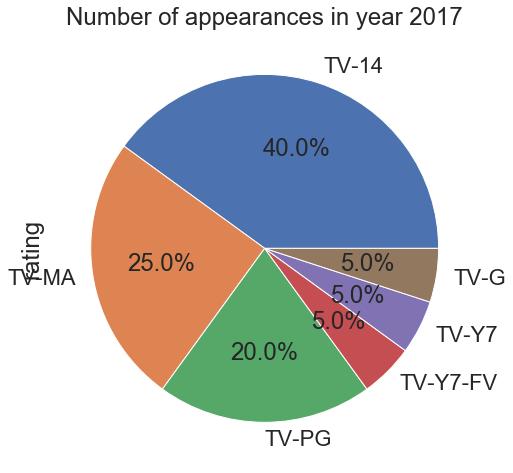

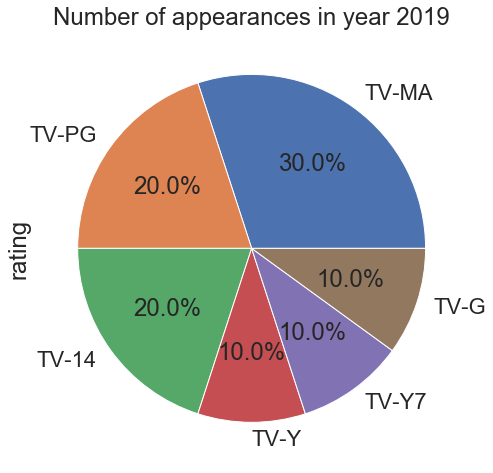

In [284]:
plt.figure(figsize=(8,8))
df1.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2017')
plt.show()

plt.figure(figsize=(8,8))
df2.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2019')
plt.show()



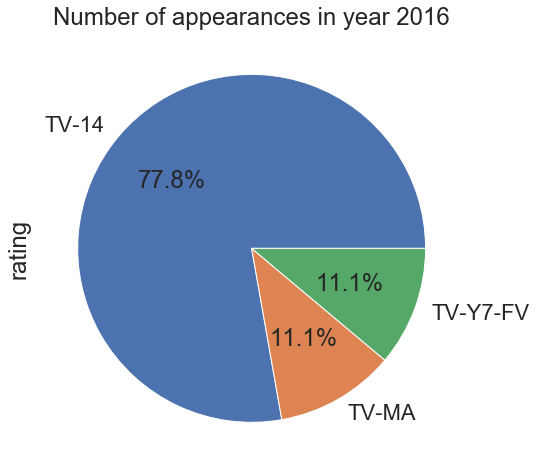

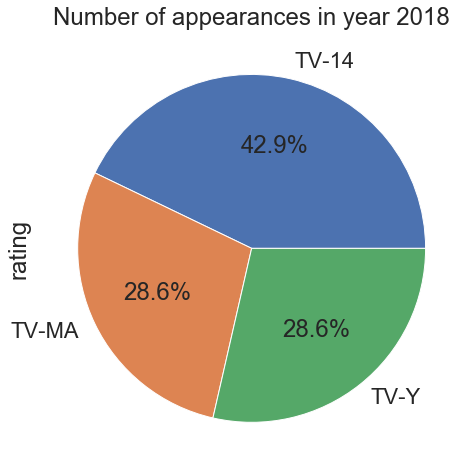

In [283]:
plt.figure(figsize=(8,8))
df3.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2016')
plt.show()

plt.figure(figsize=(8,8))
df4.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2018')
plt.show()

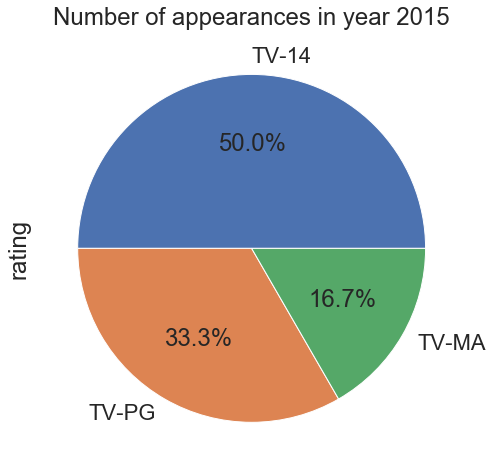

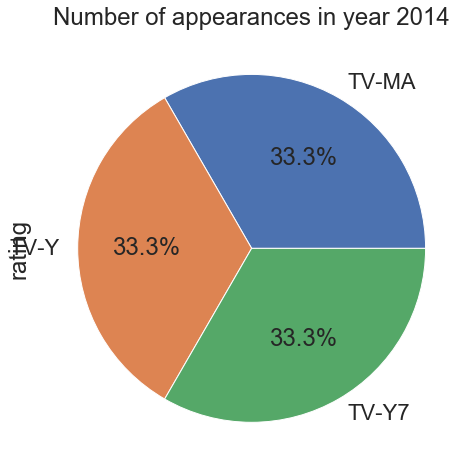

In [282]:
plt.figure(figsize=(8,8))
df5.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2015')
plt.show()

plt.figure(figsize=(8,8))
df6.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2014')
plt.show()

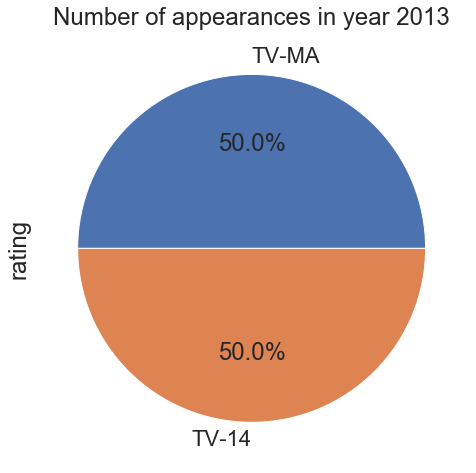

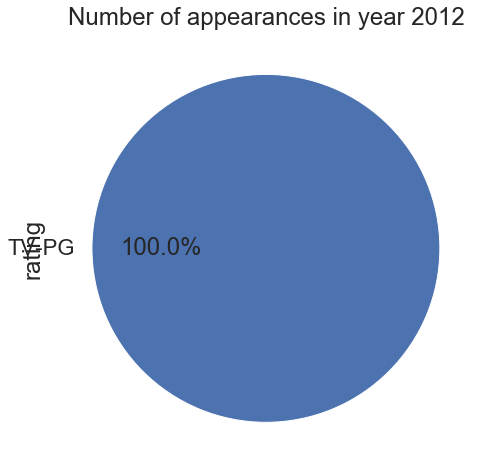

In [281]:
plt.figure(figsize=(8,8))
df7.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2013')
plt.show()

plt.figure(figsize=(8,8))
df8.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in year 2012')
plt.show()